In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Kết nối MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Minhthinh@2k5",
    database="DB_STORAGE2"
)

# Lấy toàn bộ dữ liệu từ bảng
query = "SELECT * FROM houses"
df = pd.read_sql(query, conn)

# Đóng kết nối
conn.close()

# Kiểm tra dữ liệu
df.shape    # Số dòng, số cột
df.info()   # Kiểu dữ liệu



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3652 non-null   int64 
 1   location       3652 non-null   object
 2   price          3344 non-null   object
 3   area           3652 non-null   object
 4   date_posted    3652 non-null   object
 5   fridge         3652 non-null   object
 6   washer         3652 non-null   object
 7   air_condition  3652 non-null   object
 8   wifi           3652 non-null   object
dtypes: int64(1), object(8)
memory usage: 256.9+ KB


C:\Users\PC THINH\AppData\Local\Temp\ipykernel_35064\2069839808.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [2]:
#Mô tả thống kê cơ bản→ Giúp bạn biết giá trị trung bình, min, max, độ lệch chuẩn, giá trị thiếu (NaN)...
df.describe(include="all")

,id,location,price,area,date_posted,fridge,washer,air_condition,wifi
count,3652.000000,3652,3344,3652,3652,3652,3652,3652,3652
unique,NaN,7,39,35,84,2,2,2,2
top,NaN,"Hải Châu, Đà Nẵng",1500000.0,20.0,2021-10-28,0,0,0,0
freq,NaN,920,500,934,479,2521,2433,2491,2087
mean,1946.883078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1101.710486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,991.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1957.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2904.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Ép kiểu dữ liệu đúng chuẩn -> 
print(df.dtypes)
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["area"] = pd.to_numeric(df["area"], errors="coerce")

df["date_posted"] = pd.to_datetime(df["date_posted"], errors="coerce")




id                int64
location         object
price            object
area             object
date_posted      object
fridge           object
washer           object
air_condition    object
wifi             object
dtype: object


In [4]:
df['id'].duplicated().sum()


np.int64(0)

In [5]:
#kiểm tra dữ liệu bị thiếu (NaN)
df.isnull().sum().sort_values(ascending=False)


price            308
id                 0
location           0
area               0
date_posted        0
fridge             0
washer             0
air_condition      0
wifi               0
dtype: int64

In [6]:
df.isnull().sum().sort_values(ascending=False)
(df['price'].isnull().sum() / len(df)) * 100


np.float64(8.433734939759036)

In [7]:
df['price'] = df['price'].fillna(df['price'].mean())

In [8]:
df = df[(df['price'] >= 1500000) & (df['price'] <= 15000000)]
df = df[(df['area'] >= 10) & (df['area'] <= 50)]

df['district'] = df['location'].apply(lambda x: x.split(',')[0].strip())

In [9]:
# Đếm số dòng trùng lặp
duplicates = df[df.duplicated()]
print(f"Số dòng trùng lặp trước khi xóa: {len(duplicates)}")

# Xóa dòng trùng lặp
df = df.drop_duplicates()

# Kiểm tra lại sau khi xóa
duplicates_after = df[df.duplicated()]
print(f"Số dòng trùng lặp sau khi xóa: {len(duplicates_after)}")



Số dòng trùng lặp trước khi xóa: 0
Số dòng trùng lặp sau khi xóa: 0


In [10]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 2683 entries, 0 to 3651
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             2683 non-null   int64         
 1   location       2683 non-null   object        
 2   price          2683 non-null   float64       
 3   area           2683 non-null   float64       
 4   date_posted    2683 non-null   datetime64[ns]
 5   fridge         2683 non-null   object        
 6   washer         2683 non-null   object        
 7   air_condition  2683 non-null   object        
 8   wifi           2683 non-null   object        
 9   district       2683 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 230.6+ KB
None
                id         price         area                    date_posted
count  2683.000000  2.683000e+03  2683.000000                           2683
mean   1812.188222  2.240477e+06    24.10957

In [11]:
utilities = ['fridge', 'washer', 'air_condition', 'wifi']

for col in utilities:
    df[col] = df[col].apply(lambda x: 1 if '1' in str(x) else 0)

df[utilities] = df[utilities].astype(int)

print(df[utilities].head())
print(df[utilities].mean())


   fridge  washer  air_condition  wifi
0       1       1              1     1
1       1       1              1     1
2       0       0              0     1
5       0       0              0     0
6       0       0              0     0
fridge           0.349981
washer           0.381290
air_condition    0.361163
wifi             0.455088
dtype: float64


In [12]:
# Tính phần trăm tiện ích có trong phòng
utility_percent = (df[['fridge', 'washer', 'air_condition', 'wifi']].mean() * 100).round(2)
print("📊 Tỷ lệ phòng có tiện ích (%):")
print(utility_percent)


📊 Tỷ lệ phòng có tiện ích (%):
fridge           35.00
washer           38.13
air_condition    36.12
wifi             45.51
dtype: float64


In [13]:
#Nếu vẫn còn giá trị bất thường, nên dùng IQR để loại bỏ tự động: Cách này giúp lọc theo phân phối thực tế của dữ liệu, thay vì cắt cứng bằng ngưỡng.
# Lọc outlier theo IQR cho price
# --- Sao chép DataFrame trước khi lọc ---
df_before = df.copy()

# Lọc outlier theo IQR cho price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

# Lọc outlier theo IQR cho area
Q1_a = df['area'].quantile(0.25)
Q3_a = df['area'].quantile(0.75)
IQR_a = Q3_a - Q1_a
df = df[(df['area'] >= Q1_a - 1.5 * IQR_a) & (df['area'] <= Q3_a + 1.5 * IQR_a)]

# --- Sao chép sau khi lọc ---
df_after = df.copy()

# In số dòng thay đổi
print(f"Số dòng trước lọc IQR: {len(df_before)}")
print(f"Số dòng sau lọc IQR: {len(df_after)}")
print(f"Đã loại bỏ {len(df_before) - len(df_after)} dòng outlier.")



Số dòng trước lọc IQR: 2683
Số dòng sau lọc IQR: 2431
Đã loại bỏ 252 dòng outlier.


In [14]:
df['price_million'] = df['price'] / 1_000_000

print(df[['id', 'area', 'price_million']].describe().round(2))


            id     area  price_million
count  2431.00  2431.00        2431.00
mean   1816.98    22.82           2.09
std    1092.84     5.37           0.55
min       3.00    12.00           1.50
25%     877.50    20.00           1.60
50%    1740.00    20.00           2.00
75%    2758.50    25.00           2.50
max    3817.00    35.00           3.70


In [15]:

# Tạo cột price_million
df['price_million'] = df['price'] / 1_000_000

# Hiển thị thống kê mô tả của id, area, và price_million
print("📊 Thống kê mô tả (id, area, price_million):")
print(df[['id', 'area', 'price_million']].describe().round(2))
print("\n")

# Hiển thị thống kê mô tả tổng quát (bao gồm cả cột dạng chuỗi)
print("📈 Thống kê mô tả (tất cả các cột):")
print(df.describe(include='all').round(2))
print("\n")

# Hiển thị thông tin chi tiết về kiểu dữ liệu và số lượng non-null
print("🧱 Thông tin DataFrame:")
df.info()


📊 Thống kê mô tả (id, area, price_million):
            id     area  price_million
count  2431.00  2431.00        2431.00
mean   1816.98    22.82           2.09
std    1092.84     5.37           0.55
min       3.00    12.00           1.50
25%     877.50    20.00           1.60
50%    1740.00    20.00           2.00
75%    2758.50    25.00           2.50
max    3817.00    35.00           3.70


📈 Thống kê mô tả (tất cả các cột):
             id           location       price     area  \
count   2431.00               2431     2431.00  2431.00   
unique      NaN                  7         NaN      NaN   
top         NaN  Hải Châu, Đà Nẵng         NaN      NaN   
freq        NaN                671         NaN      NaN   
mean    1816.98                NaN  2093336.08    22.82   
min        3.00                NaN  1500000.00    12.00   
25%      877.50                NaN  1600000.00    20.00   
50%     1740.00                NaN  2000000.00    20.00   
75%     2758.50                NaN  2

In [ ]:
#  Tạo cột mới: Giá thuê trên mỗi m² (đơn vị: triệu đồng/m²)
df['price_per_area'] = df['price_million'] / df['area']

# Xem vài dòng đầu tiên
print(df[['district', 'area', 'price_million', 'price_per_area']].head())


       district  area  price_million  price_per_area
2      Hải Châu  23.0            2.5        0.108696
5      Hải Châu  20.0            1.9        0.095000
6  Ngũ Hành Sơn  16.0            1.5        0.093750
7        Cẩm Lệ  18.0            2.5        0.138889
8      Hải Châu  20.0            1.9        0.095000


In [17]:
print("Shape sau xử lý:", df.shape)
print("Thiếu dữ liệu:\n", df.isnull().sum())
print("Quận còn lại:", df['location'].unique())
print("Range giá:", df['price'].min(), "-", df['price'].max())
print("Range diện tích:", df['area'].min(), "-", df['area'].max())


Shape sau xử lý: (2431, 12)
Thiếu dữ liệu:
 id                0
location          0
price             0
area              0
date_posted       0
fridge            0
washer            0
air_condition     0
wifi              0
district          0
price_million     0
price_per_area    0
dtype: int64
Quận còn lại: ['Hải Châu, Đà Nẵng' 'Ngũ Hành Sơn, Đà Nẵng' 'Cẩm Lệ, Đà Nẵng'
 'Sơn Trà, Đà Nẵng' 'Thanh Khê, Đà Nẵng' 'Liên Chiểu, Đà Nẵng'
 'Hòa Vang, Đà Nẵng']
Range giá: 1500000.0 - 3700000.0
Range diện tích: 12.0 - 35.0


In [18]:
import pandas as pd

# 1️⃣ Kiểm tra kích thước dữ liệu
print("Shape dữ liệu:", df.shape)

# 2️⃣ Kiểm tra dữ liệu null
print("\nNull values:")
print(df.isnull().sum())

# 3️⃣ Kiểm tra kiểu dữ liệu của các cột
print("\nKiểu dữ liệu (dtypes):")
print(df.dtypes)

# 4️⃣ Kiểm tra dữ liệu trùng lặp
dups = df.duplicated().sum()
print(f"\nSố dòng trùng lặp: {dups}")

# 5️⃣ Kiểm tra thống kê cơ bản của số (price, area,…)
print("\nThống kê mô tả các cột dạng số:")
print(df.describe())

# 6️⃣ Kiểm tra cột category: có giá trị bất thường không?
print("\nUnique Location:", df['location'].unique())

# 7️⃣ Kiểm tra logic giá và diện tích
print("\nGiá trị MIN-MAX Price:", df['price'].min(), '-', df['price'].max())
print(" Giá trị MIN-MAX Area:", df['area'].min(), '-', df['area'].max())

# 8️⃣ Kiểm tra ngày đăng có lỗi tương lai?
future_date_count = sum(df['date_posted'] > pd.Timestamp.today())
print(f"\nSố bản ghi có ngày đăng trong tương lai: {future_date_count}")

# 9️⃣ Kiểm tra phân phối District (xem có lệch quá không?)
print("\nSố lượng phòng theo quận:")
print(df['location'].value_counts())


Shape dữ liệu: (2431, 12)

Null values:
id                0
location          0
price             0
area              0
date_posted       0
fridge            0
washer            0
air_condition     0
wifi              0
district          0
price_million     0
price_per_area    0
dtype: int64

Kiểu dữ liệu (dtypes):
id                         int64
location                  object
price                    float64
area                     float64
date_posted       datetime64[ns]
fridge                     int64
washer                     int64
air_condition              int64
wifi                       int64
district                  object
price_million            float64
price_per_area           float64
dtype: object

Số dòng trùng lặp: 0

Thống kê mô tả các cột dạng số:
                id         price         area                    date_posted  \
count  2431.000000  2.431000e+03  2431.000000                           2431   
mean   1816.979021  2.093336e+06    22.819827  2022-05-07 

In [19]:
# Xóa bản ghi Hòa Vang có giá = 6,000,000 VND
df = df[~((df['location'] == "Hòa Vang") & (df['price'] == 6_000_000))]

# Kiểm tra lại số bản ghi Hòa Vang
print(df[df['location']=="Hòa Vang"].shape)


(0, 12)


In [20]:
print(f"Số bản ghi còn lại: {len(df)}")

Số bản ghi còn lại: 2431


In [21]:
# Tính giá trung bình theo từng quận
mean_price_by_district = df.groupby('location')['price'].mean().sort_values(ascending=False)
print(mean_price_by_district)


location
Sơn Trà, Đà Nẵng         2.394783e+06
Ngũ Hành Sơn, Đà Nẵng    2.217480e+06
Hải Châu, Đà Nẵng        2.194486e+06
Thanh Khê, Đà Nẵng       2.020937e+06
Cẩm Lệ, Đà Nẵng          1.943149e+06
Liên Chiểu, Đà Nẵng      1.735161e+06
Hòa Vang, Đà Nẵng        1.663636e+06
Name: price, dtype: float64


In [22]:
# --- Tạo cột 'district' từ cột 'location' ---
df['district'] = df['location'].apply(lambda x: str(x).split(',')[0].strip())

# Chuẩn hóa tên quận (loại bỏ 'Quận', 'quận', viết hoa đầu chữ)
df['district'] = df['district'].str.replace(r'Quận |quận ', '', regex=True).str.title().str.strip()

print("Các quận hiện có:", df['district'].unique())


Các quận hiện có: ['Hải Châu' 'Ngũ Hành Sơn' 'Cẩm Lệ' 'Sơn Trà' 'Thanh Khê' 'Liên Chiểu'
 'Hòa Vang']


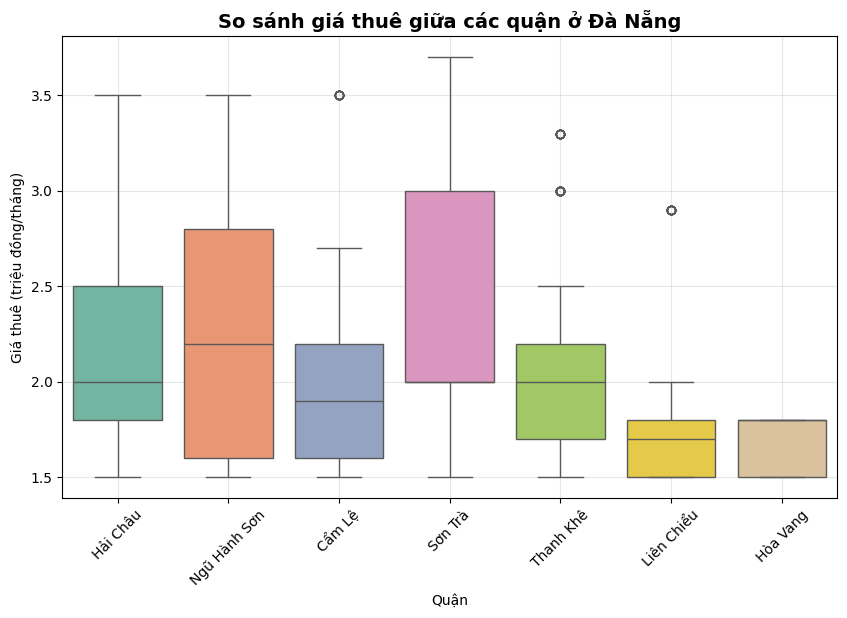

Top 3 quận có giá thuê trung bình cao nhất:
district
Sơn Trà         2.394783
Ngũ Hành Sơn    2.217480
Hải Châu        2.194486
Name: price_million, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển giá về triệu đồng
df['price_million'] = df['price'] / 1_000_000

plt.figure(figsize=(10,6))
sns.boxplot(x='district', y='price_million', hue='district', data=df, palette='Set2', legend=False)
plt.title("So sánh giá thuê giữa các quận ở Đà Nẵng", fontsize=14, weight='bold')
plt.xlabel("Quận")
plt.ylabel("Giá thuê (triệu đồng/tháng)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

top3 = df.groupby('district')['price_million'].mean().sort_values(ascending=False).head(3)
print("Top 3 quận có giá thuê trung bình cao nhất:")
print(top3)


#Giúp bạn xem quận nào đắt nhất (ví dụ Hải Châu cao hơn Cẩm Lệ).


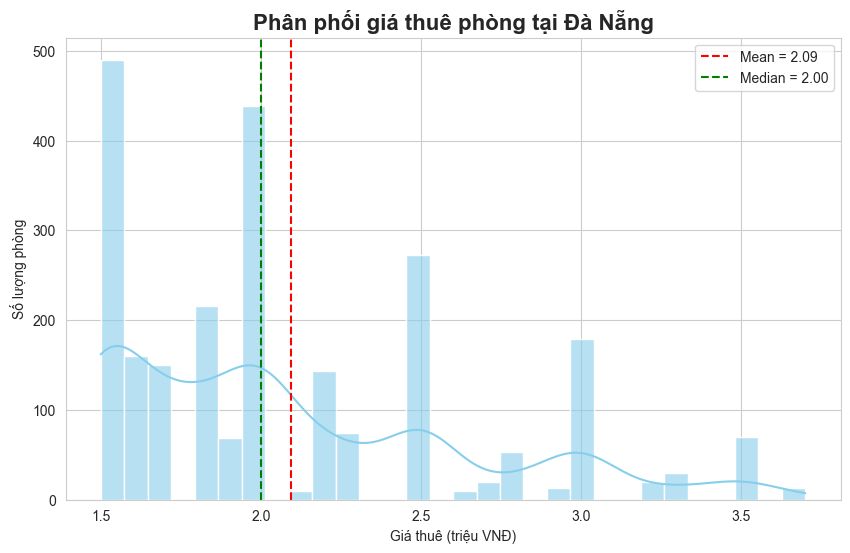

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.histplot(
    data=df,
    x='price_million',
    bins=30,
    kde=True,
    color='skyblue',
    alpha=0.6
)

mean_price = df['price_million'].mean()
median_price = df['price_million'].median()

plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean = {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', label=f'Median = {median_price:.2f}')

plt.title("Phân phối giá thuê phòng tại Đà Nẵng", fontsize=16, weight='bold')
plt.xlabel("Giá thuê (triệu VNĐ)")
plt.ylabel("Số lượng phòng")
plt.legend()

plt.show()



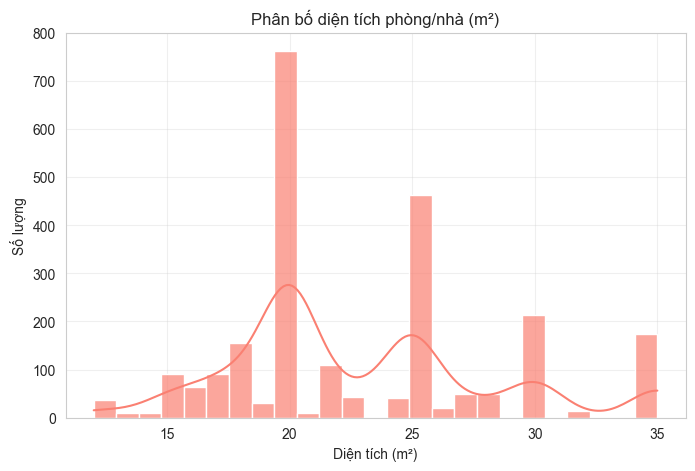

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['area'], bins=25, kde=True, color='salmon', edgecolor='white', alpha=0.7)
plt.title("Phân bố diện tích phòng/nhà (m²)")
plt.xlabel("Diện tích (m²)")
plt.ylabel("Số lượng")
plt.grid(alpha=0.3)
plt.show()


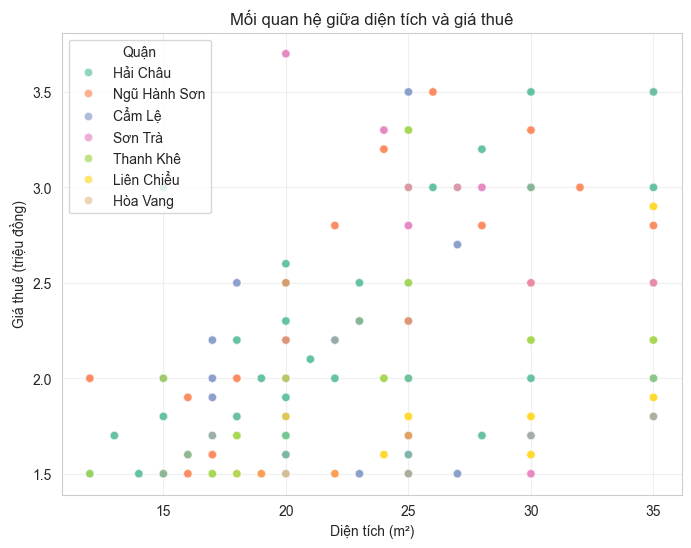

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='area',               # Diện tích
    y='price_million',      # Giá theo triệu đồng
    data=df,
    hue='district',         # Tô màu theo quận (tùy chọn)
    palette='Set2',
    alpha=0.7
)
plt.title("Mối quan hệ giữa diện tích và giá thuê")
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá thuê (triệu đồng)")
plt.legend(title="Quận")
plt.grid(alpha=0.3)
plt.show()


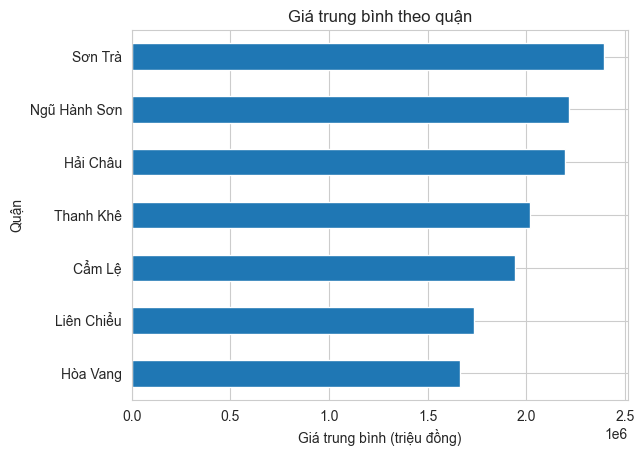

In [27]:
df.groupby('district')['price'].mean().sort_values().plot(kind='barh')
plt.title("Giá trung bình theo quận")
plt.xlabel("Giá trung bình (triệu đồng)")
plt.ylabel("Quận")
plt.show()


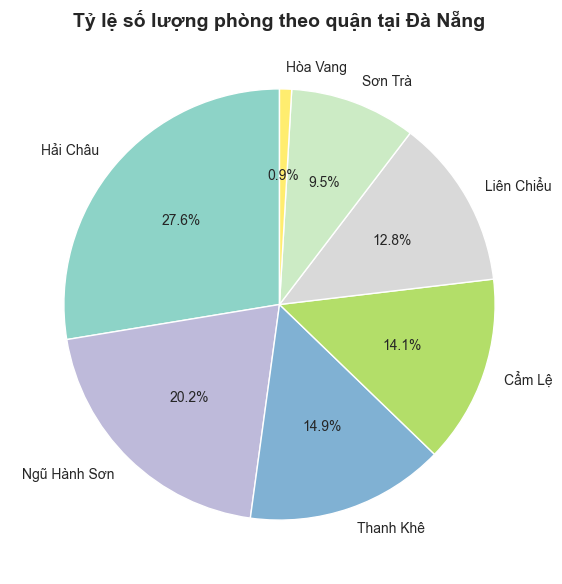

In [28]:
plt.figure(figsize=(7,7))
df['district'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Tỷ lệ số lượng phòng theo quận tại Đà Nẵng", fontsize=14, weight='bold')
plt.ylabel('')
plt.show()


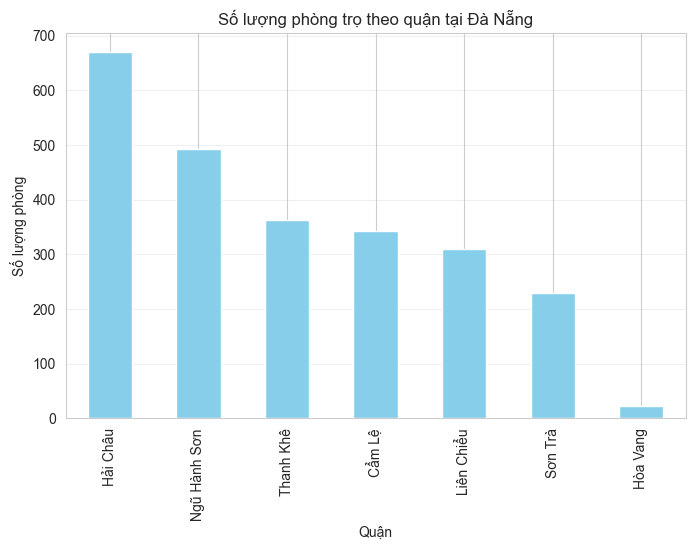

In [29]:
plt.figure(figsize=(8,5))
df['district'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Số lượng phòng trọ theo quận tại Đà Nẵng")
plt.xlabel("Quận")
plt.ylabel("Số lượng phòng")
plt.grid(axis='y', alpha=0.3)
plt.show()


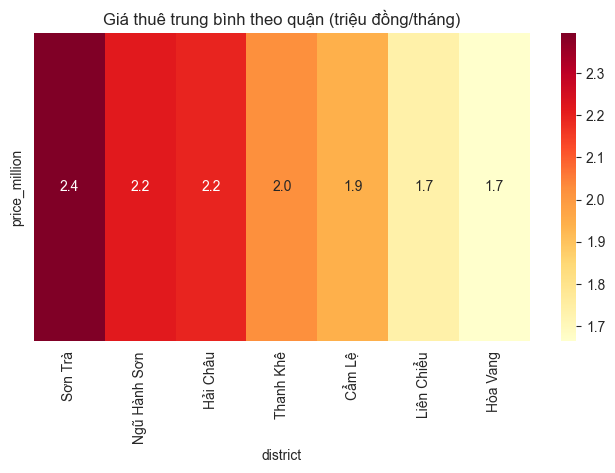

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

district_avg = df.groupby('district')['price_million'].mean().reset_index()
district_avg = district_avg.sort_values('price_million', ascending=False)

plt.figure(figsize=(8,4))
sns.heatmap(
    district_avg.set_index('district').T,
    annot=True, cmap='YlOrRd', fmt=".1f"
)
plt.title("Giá thuê trung bình theo quận (triệu đồng/tháng)")
plt.show()
